## 분류: 지도학습의 대표적 유형. 명시적인 정답(레이블)이 있는 데이터가 주어진 상태에서 학습하여 모델을 생성하고 미지의 레이블 값을 예측하는 것. 

- 나이브 베이즈, 로지스틱 회귀, 결정 트리, 서포트 벡터 머신, 최소 근접 알고리즘, 신경망
- 앙상블: 서로 다른/같은 알고리즘을 결합, 배깅과 부스팅 방식으로 나뉨.

### 1. 결정 트리: 데이터에 있는 규칙을 학습을 통해 찾아내 트리 기반의 분류 규칙을 만드는 것 
- if/else 기반으로 나타내는 것. 규칙 노드로 규칙 조건 표시, 리프 노드로 결정된 클래스 값 표시,
- 분류 조건이 많아질수록, 즉 트리의 깊이가 깊어질수록 성능 저하될 가능성이 높음. 어떻게 트리를 분할할 것인가가 중요한데, 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요함. 데이터의 혼잡도가 적은 세트..!
- 정보의 균일도 측정: 엔트로피(데이터 집합의 혼잡도)를 이용한 정보 이득 지수와 지니 계수
    - 정보 이득 지수 = 1-엔트로피 지수
    - 경제학에서 불평등 지수, 머신러닝에서는 지니 계수가 낮을수록 균일도가 높은 것으로 해석

- 사이킷런: DecisionTreeClassifier, DecisionTreeRegressor 클래스
    - 파라미터: min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

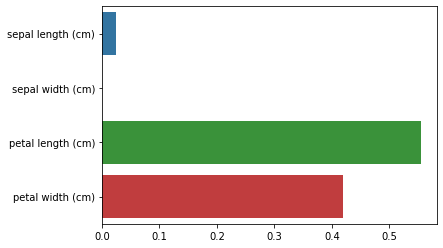

In [3]:
# 피처별 중요도: feature_importances_

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
%matplotlib inline

dt_clf = DecisionTreeClassifier(random_state=156)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))

sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

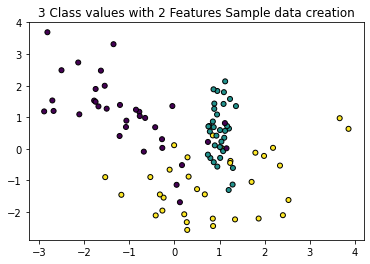

In [4]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,\
                                          n_classes=3, n_clusters_per_class=1, random_state=0)
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv("./human_activity/features.txt", sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [8]:
# 전체 피처명 리스트
feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [14]:
# 중복된 피처명 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1]

## 총 42개의 피처명이 중복 => 원본 피처명에 _1 또는 _2를 추가로 부여하기

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


In [31]:
def get_new_feature_df(old_feature_name_df): 
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 \
                                                                                             else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [32]:
feature_dup_df = pd.DataFrame(data = feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
feature_dup_df = feature_dup_df.reset_index()
new_feature_name_df = pd.merge(feature_name_df.reset_index(), feature_dup_df, how='outer')
new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 \
                                                                                             else x[0], axis=1)
new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
new_feature_name_df

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


In [33]:
# 데이터셋 불러오기
import pandas as pd

def get_human_dataset():
    feature_name_df = pd.read_csv("./human_activity/features.txt", sep='\s+', header=None, names=['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv("./human_activity/train/X_train.txt", sep='\s+', header=None, names = feature_name)
    X_test = pd.read_csv("./human_activity/test/X_test.txt", sep='\s+', header=None, names = feature_name)
    y_train = pd.read_csv("./human_activity/train/y_train.txt", sep='\s+', header=None, names = ['action'])
    y_test = pd.read_csv("./human_activity/test/y_test.txt", sep='\s+', header=None, names = ['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [34]:
print("## 학습 피처 데이터셋 info")
X_train.info()

## 학습 피처 데이터셋 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [37]:
y_train.value_counts() # 레이블 값이 1~6까지 6개의 값

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
dtype: int64

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8548


In [39]:
# DecisionTreeClassifier 기본 하이퍼 파라미터 추출
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [40]:
# 트리 깊이가 예측 정확도에 미치는 영향
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train) 
# verbose=0(default)면 메시지 출력 안함, verbose=1이면 간단한 메시지 출력, verbose=2이면 하이퍼 파라미터별 메시지 출력

print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
0.8548794147162603
{'max_depth': 8, 'min_samples_split': 16}


In [42]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','mean_test_score']]

# 교차검증용 데이터 세트의 정확도 평균 수치임!!
# 노드를 지속적으로 분할하면서 깊이가 깊어지고 더 복잡한 모델이 됨. 과적합으로 인한 성능 저하 유발

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [43]:
max_depths = [6, 8, 10, 12, 16, 20, 24]
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(depth, accuracy)

6 0.8551068883610451
8 0.8717339667458432
10 0.8598574821852731
12 0.8571428571428571
16 0.8598574821852731
20 0.8564642008822532
24 0.8564642008822532


In [44]:
params = {
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(np.round(grid_cv.best_score_, 4))
print(grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.8549
{'max_depth': 8, 'min_samples_split': 16}


In [45]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
np.round(accuracy,4)

0.8717

In [46]:
feature_importances = best_df_clf.feature_importances_
importances = pd.Series(feature_importances, index=X_train.columns)
importances

tBodyAcc-mean()-X                       0.000000
tBodyAcc-mean()-Y                       0.000000
tBodyAcc-mean()-Z                       0.000000
tBodyAcc-std()-X                        0.000000
tBodyAcc-std()-Y                        0.001752
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.001291
angle(tBodyGyroJerkMean,gravityMean)    0.000000
angle(X,gravityMean)                    0.000989
angle(Y,gravityMean)                    0.139001
angle(Z,gravityMean)                    0.002987
Length: 561, dtype: float64

<AxesSubplot:title={'center':'Feature Importances Top 20'}>

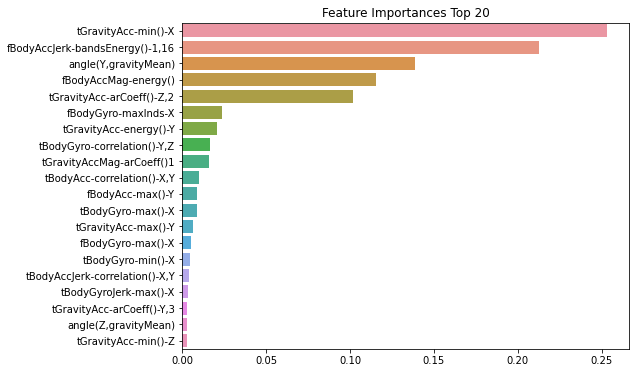

In [47]:
feature_top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20, y = feature_top20.index)